<a href="https://colab.research.google.com/github/bryantstats/math460_fa20/blob/master/car_damage_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib
 
# import the necessary packages
from sklearn.model_selection import train_test_split
import os
import tkinter
from os import listdir
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_train_dir = '/content/drive/MyDrive/car_damage/data2a/training'
data_valid_dir = '/content/drive/MyDrive/car_damage/data2a/validation'

import os
lb = [f for f in listdir(data_train_dir)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Found 979 files belonging to 3 classes.
Found 171 files belonging to 3 classes.


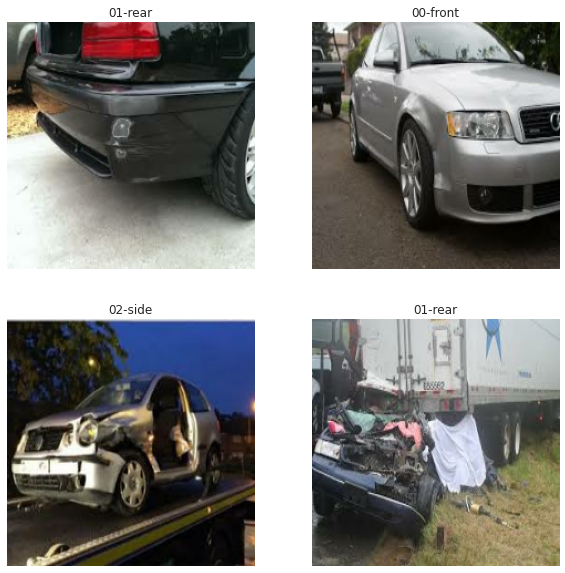

In [ ]:
batch_size = 64
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


102875136/102869336 [==============================] - 3s 0us/step
Epoch 1/500
16/16 [==============================] - 101s 6s/step - loss: 3.5715 - accuracy: 0.4188 - val_loss: 26.6315 - val_accuracy: 0.4269
Epoch 2/500
16/16 [==============================] - 5s 290ms/step - loss: 0.6004 - accuracy: 0.7814 - val_loss: 18.4442 - val_accuracy: 0.4327
Epoch 3/500
16/16 [==============================] - 4s 293ms/step - loss: 0.2965 - accuracy: 0.8973 - val_loss: 3.8669 - val_accuracy: 0.3158
Epoch 4/500
16/16 [==============================] - 5s 282ms/step - loss: 0.1093 - accuracy: 0.9589 - val_loss: 5.1190 - val_accuracy: 0.4211
Epoch 5/500
16/16 [==============================] - 5s 282ms/step - loss: 0.0834 - accuracy: 0.9802 - val_loss: 7.7044 - val_accuracy: 0.3509
Epoch 6/500
16/16 [==============================] - 5s 282ms/step - loss: 0.1230 - accuracy: 0.9671 - val_loss: 4.4074 - val_accuracy: 0.5380
Epoch 7/500
16/16 [==============================] - 4s 282ms/step - loss:

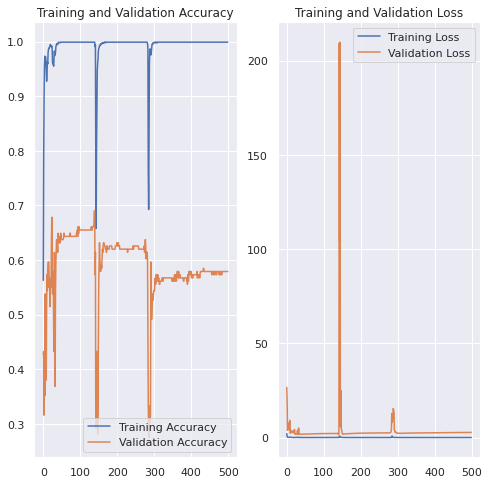

In [ ]:
# Define model
epochs = 500

model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape = (img_height, img_width, 3))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model.summary()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

from datetime import date
file_name = model.name + '_'.join(class_names) + '_epoch_' + str(epochs)+ '_batch_size_'+ str(batch_size) +  '_size_' + str(img_height)+ 'x'+ str(img_width)+ '.h5'

# Save the model
model.save(file_name)

# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



## Transfer Learning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from tensorflow.keras.preprocessing import image_dataset_from_directory


train_dir = '/content/drive/MyDrive/car_damage/data2a/training'
validation_dir = '/content/drive/MyDrive/car_damage/data2a/validation'

BATCH_SIZE = 32
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE)


Found 979 files belonging to 3 classes.


In [ ]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)



Found 171 files belonging to 3 classes.


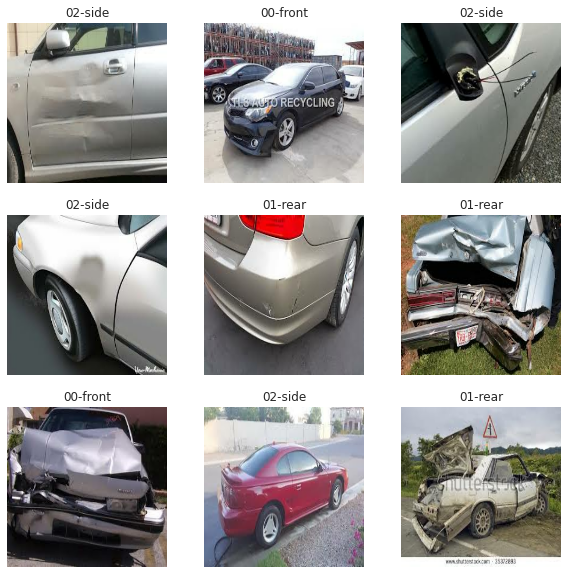

In [ ]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)


In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))


Number of validation batches: 5
Number of test batches: 1


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [ ]:
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [ ]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 5, 5, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
# Let's take a look at the base model architecture
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 160, 160, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 80, 80, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 80, 80, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 80, 80, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 1)


In [ ]:
inputs = tf.keras.Input(shape=(160, 160, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
len(model.trainable_variables)

2

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(validation_dataset)

5/5 [==============================] - 2s 36ms/step - loss: 1.4002 - accuracy: 0.4488


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.51
initial accuracy: 0.42


In [ ]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/10
31/31 [==============================] - 4s 58ms/step - loss: 1.1569 - accuracy: 0.4086 - val_loss: 0.7620 - val_accuracy: 0.4029
Epoch 2/10
31/31 [==============================] - 2s 57ms/step - loss: 0.5749 - accuracy: 0.3657 - val_loss: 0.5541 - val_accuracy: 0.3525
Epoch 3/10
31/31 [==============================] - 2s 57ms/step - loss: 0.4399 - accuracy: 0.3248 - val_loss: 0.4746 - val_accuracy: 0.3237
Epoch 4/10
31/31 [==============================] - 2s 58ms/step - loss: 0.3422 - accuracy: 0.3279 - val_loss: 0.4597 - val_accuracy: 0.2878
Epoch 5/10
31/31 [==============================] - 2s 58ms/step - loss: 0.3751 - accuracy: 0.3166 - val_loss: 0.4214 - val_accuracy: 0.2878
Epoch 6/10
31/31 [==============================] - 2s 58ms/step - loss: 0.2747 - accuracy: 0.3289 - val_loss: 0.4688 - val_accuracy: 0.2950
Epoch 7/10
31/31 [==============================] - 2s 57ms/step - loss: 0.3036 - accuracy: 0.3330 - val_loss: 0.3318 - val_accuracy: 0.2734
Epoch 8/10
31

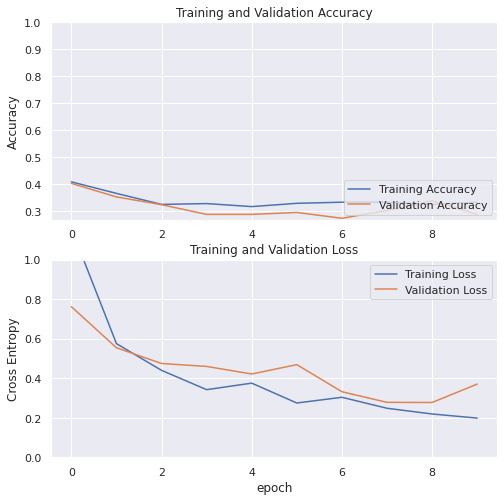

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [ ]:
len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 1000
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 10/1010
31/31 [==============================] - 7s 92ms/step - loss: 0.0686 - accuracy: 0.3319 - val_loss: -0.1661 - val_accuracy: 0.3597
Epoch 11/1010
31/31 [==============================] - 2s 63ms/step - loss: -0.3913 - accuracy: 0.3893 - val_loss: -0.6679 - val_accuracy: 0.2950
Epoch 12/1010
31/31 [==============================] - 2s 64ms/step - loss: -0.9095 - accuracy: 0.3739 - val_loss: -0.9968 - val_accuracy: 0.3741
Epoch 13/1010
31/31 [==============================] - 2s 65ms/step - loss: -1.0724 - accuracy: 0.3809 - val_loss: -1.5302 - val_accuracy: 0.3453
Epoch 14/1010
31/31 [==============================] - 2s 64ms/step - loss: -2.0561 - accuracy: 0.3435 - val_loss: -2.6881 - val_accuracy: 0.3453
Epoch 15/1010
31/31 [==============================] - 2s 62ms/step - loss: -3.0867 - accuracy: 0.3890 - val_loss: -3.3507 - val_accuracy: 0.3453
Epoch 16/1010
31/31 [==============================] - 2s 62ms/step - loss: -3.3665 - accuracy: 0.3796 - val_loss: -3.9803 - 

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

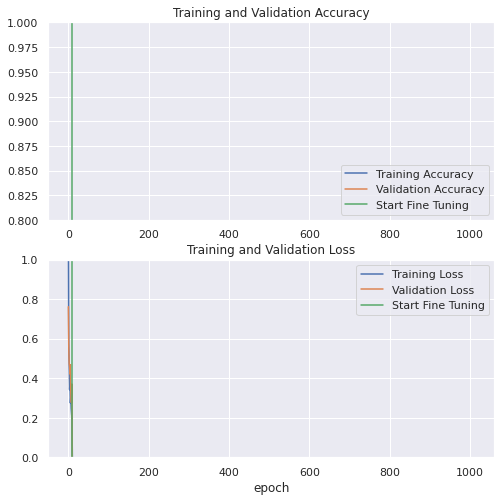

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

1/1 [==============================] - 0s 279ms/step - loss: -1.4534 - accuracy: 0.5000
Test accuracy : 0.5


Predictions:
 [1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1]
Labels:
 [1 0 2 0 1 2 1 1 0 1 0 1 0 0 2 0 2 0 2 0 2 0 2 0 2 1 0 2 1 2 0 2]


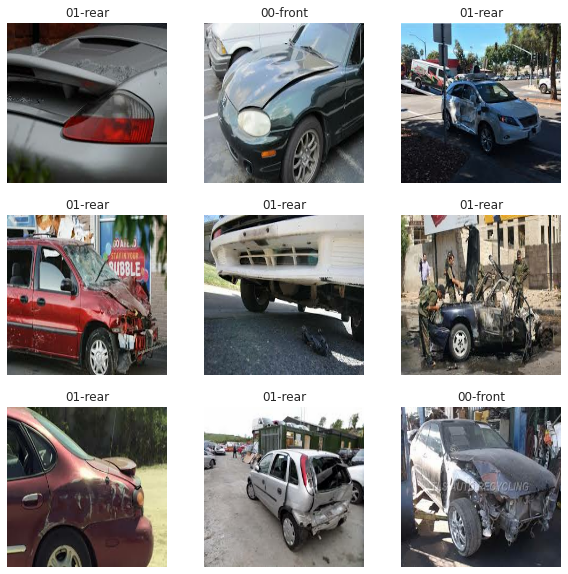

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Found 979 files belonging to 3 classes.
Found 171 files belonging to 3 classes.
Epoch 1/500
62/62 [==============================] - 18s 184ms/step - loss: 2.0308 - accuracy: 0.5260 - val_loss: 8.4448 - val_accuracy: 0.2807
Epoch 2/500
62/62 [==============================] - 9s 143ms/step - loss: 0.5803 - accuracy: 0.7697 - val_loss: 1.8323 - val_accuracy: 0.5029
Epoch 3/500
62/62 [==============================] - 9s 143ms/step - loss: 0.4707 - accuracy: 0.8275 - val_loss: 3.0227 - val_accuracy: 0.3158
Epoch 4/500
62/62 [==============================] - 9s 143ms/step - loss: 0.4959 - accuracy: 0.8064 - val_loss: 3.5232 - val_accuracy: 0.3392
Epoch 5/500
62/62 [==============================] - 9s 143ms/step - loss: 0.3261 - accuracy: 0.8795 - val_loss: 2.0353 - val_accuracy: 0.5965
Epoch 6/500
62/62 [==============================] - 9s 143ms/step - loss: 0.2187 - accuracy: 0.9253 - val_loss: 1.0509 - val_accuracy: 0.6199
Epoch 7/500
62/62 [==============================] - 9s 143ms

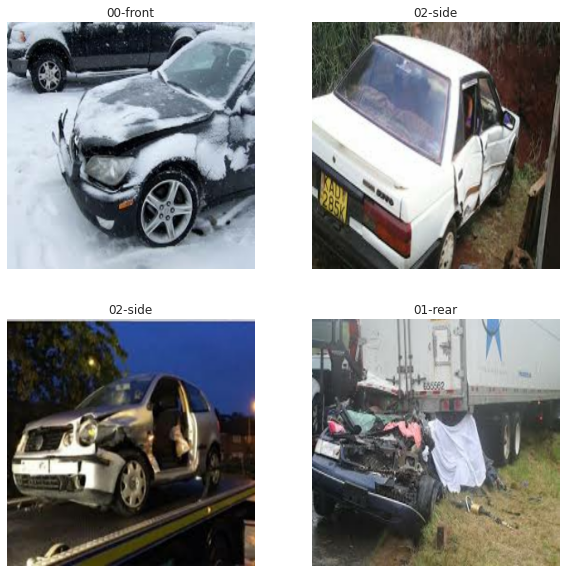

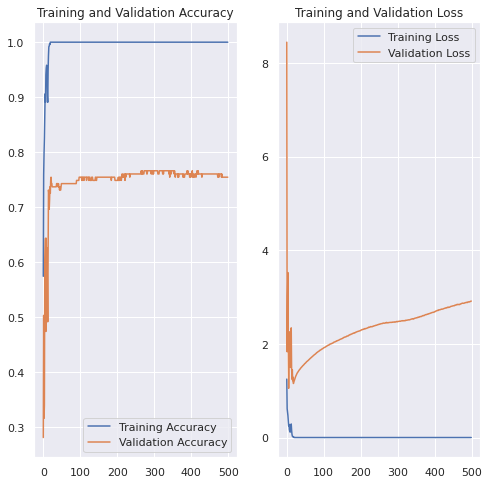

In [ ]:
batch_size = 16
img_height = 299
img_width = 299

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_train_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_valid_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)



# Define model
epochs = 500

model = tf.keras.applications.InceptionV3(weights='imagenet', input_shape = (299, 299, 3))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model.summary()

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

from datetime import date
file_name = model.name + '_'.join(class_names) + '_epoch_' + str(epochs)+ '_batch_size_'+ str(batch_size) +  '_size_' + str(img_height)+ 'x'+ str(img_width)+ '.h5'

# Save the model
model.save(file_name)

# Plot accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
